In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [168]:
df = pd.read_csv('data4.csv')

In [169]:
df.head()

,SALE_DT,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,0.00
1,1964-02,16553359.58
2,1964-03,17956624.58
3,1964-04,19440652.23
4,1964-05,20677704.73


In [170]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,0.00
1,1964-02,16553359.58
2,1964-03,17956624.58
3,1964-04,19440652.23
4,1964-05,20677704.73


In [171]:
df.shape

(107, 2)

In [172]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [173]:
df.tail()

,Month,Sales
102,1972-07,32827740.40
103,1972-08,28307225.16
104,1972-09,17084794.84
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [174]:
df.drop(106, axis=0, inplace=True)

In [175]:
df.drop(105, axis=0, inplace=True)

In [176]:
df.shape

(105, 2)

In [177]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [178]:
df['Month'] = pd.to_datetime(df['Month'])

In [179]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [180]:
df.head()

,Month,Sales
0,1964-01-01,0.00
1,1964-02-01,16553359.58
2,1964-03-01,17956624.58
3,1964-04-01,19440652.23
4,1964-05-01,20677704.73


In [181]:
df.set_index('Month', inplace=True)

In [182]:
df.head()

,Sales
Month,
1964-01-01,0.00
1964-02-01,16553359.58
1964-03-01,17956624.58
1964-04-01,19440652.23
1964-05-01,20677704.73


In [183]:
df.describe()

,Sales
count,1.050000e+02
mean,2.174447e+07
std,6.690965e+06
min,0.000000e+00
25%,1.664345e+07
50%,1.943682e+07
75%,2.635855e+07
max,3.932830e+07


<Axes: xlabel='Month'>

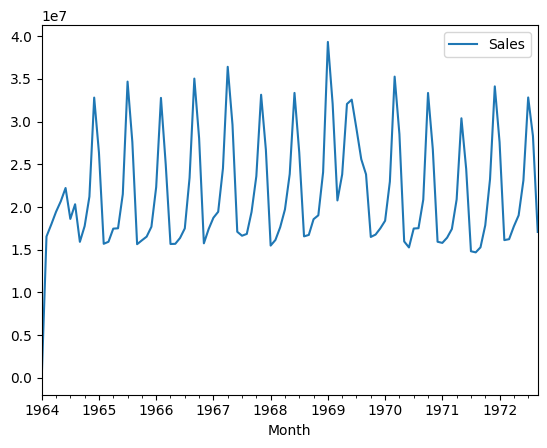

In [184]:
df.plot()

In [185]:
adfuller(df['Sales'])

(-2.273405419053607,
 0.18068874198868984,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 2963.301049905933)

In [186]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['ADF test statistics', 'p-value', 'Lags used', 'Number of obs used']
    
    for value, label in zip(result, labels):
        print('{} : {} '.format(label, value))
        
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, reject the null hypothesis and data is stationary')
    else:
        print('Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary')

In [187]:
adfuller_test(df['Sales'])

ADF test statistics : -2.273405419053607 
p-value : 0.18068874198868984 
Lags used : 11 
Number of obs used : 93 
Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary


In [188]:
df

,Sales
Month,
1964-01-01,0.00
1964-02-01,16553359.58
1964-03-01,17956624.58
1964-04-01,19440652.23
1964-05-01,20677704.73
...,...
1972-05-01,19030887.11
1972-06-01,23123182.69
1972-07-01,32827740.40


In [189]:
df['Sales'].shift(1)

Month
1964-01-01            NaN
1964-02-01           0.00
1964-03-01    16553359.58
1964-04-01    17956624.58
1964-05-01    19440652.23
                 ...     
1972-05-01    17743720.91
1972-06-01    19030887.11
1972-07-01    23123182.69
1972-08-01    32827740.40
1972-09-01    28307225.16
Name: Sales, Length: 105, dtype: float64

In [190]:
df['Sales first diff.'] = df['Sales'] - df['Sales'].shift(1)

In [191]:
df.head()

,Sales,Sales first diff.
Month,,
1964-01-01,0.00,NaN
1964-02-01,16553359.58,16553359.58
1964-03-01,17956624.58,1403265.00
1964-04-01,19440652.23,1484027.65
1964-05-01,20677704.73,1237052.50


In [192]:
df['Seasonal first diff.'] = df['Sales'] - df['Sales'].shift(12)

In [193]:
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,0.00,NaN,NaN
1964-02-01,16553359.58,16553359.58,NaN
1964-03-01,17956624.58,1403265.00,NaN
1964-04-01,19440652.23,1484027.65,NaN
1964-05-01,20677704.73,1237052.50,NaN


In [194]:
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test statistics : -2.5616155819786433 
p-value : 0.10119285168460401 
Lags used : 12 
Number of obs used : 80 
Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary


<Axes: xlabel='Month'>

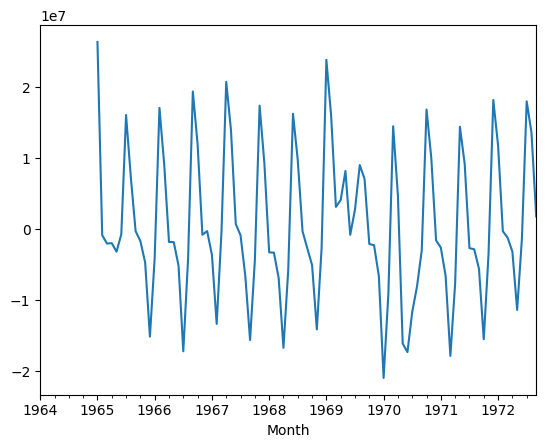

In [195]:
df['Seasonal first diff.'].plot()

In [196]:
df.head(15)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,0.00,NaN,NaN
1964-02-01,16553359.58,16553359.58,NaN
1964-03-01,17956624.58,1403265.00,NaN
1964-04-01,19440652.23,1484027.65,NaN
1964-05-01,20677704.73,1237052.50,NaN
1964-06-01,22229914.30,1552209.57,NaN
1964-07-01,18611285.74,-3618628.56,NaN
1964-08-01,20327526.89,1716241.15,NaN
1964-09-01,15926751.58,-4400775.31,NaN


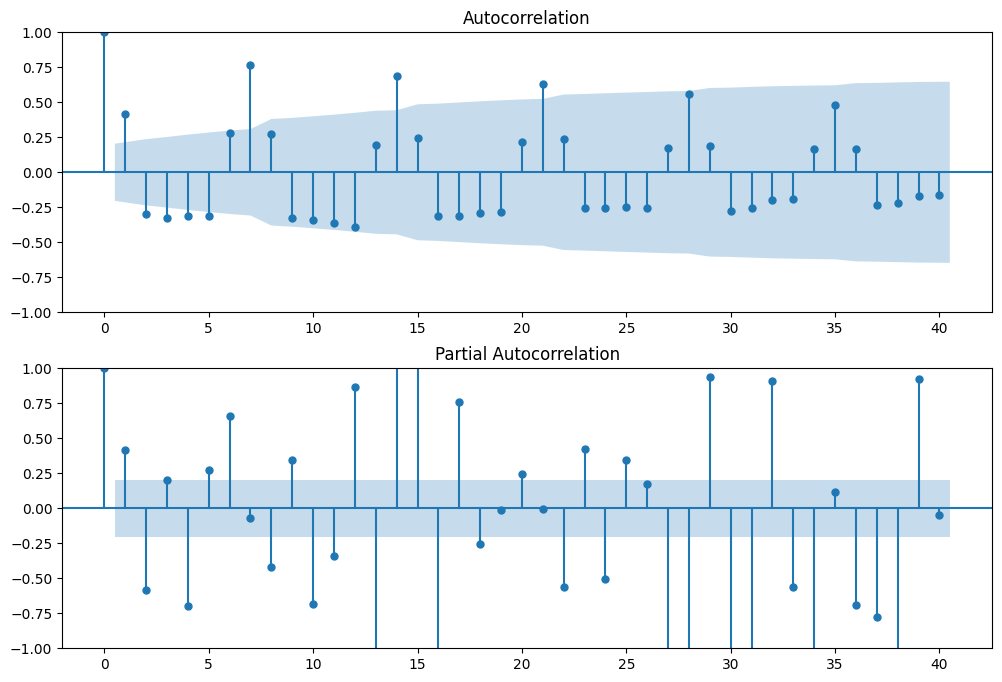

In [197]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax2)

In [199]:
model = ARIMA(df['Sales'], order=(1,1,1))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [200]:
model = model.fit()

In [201]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1594.173
Date:                            Fri, 28 Apr 2023   AIC                           3198.346
Time:                                    12:41:22   BIC                           3210.955
Sample:                                01-01-1964   HQIC                          3203.435
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2118      0.793     -0.267      0.789      -1.766       1.342
ma.L1          0.6026      0.714      0.844      0.399      -0.797       2.002
ar.S.L12      -0.3906      0.471     -0.829      0.407      -1.314       0.533
ma.S.L12      -0.6151      0.530     -1.162      0.245      -1.653       0.423
sigma2      1.167e+14        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.66   Prob(JB):                         0.57
Heteroskedasticity (H):               1.04   Skew:                            -0.19
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.56e+45. Standard errors may be unstable.
"""

In [202]:
df.shape

(105, 3)

In [203]:
df['forecast'] = model.predict(start=90, end=103, dynamic=True)

In [204]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast
Month,,,,
1971-02-01,16416571.74,611696.72,-6566329.25,NaN
1971-03-01,17432946.52,1016374.78,-17833880.58,NaN
1971-04-01,20893607.48,3460660.96,-7641881.43,NaN
1971-05-01,30390872.61,9497265.13,14418081.34,NaN
1971-06-01,24457859.11,-5933013.50,9185030.02,NaN
1971-07-01,14825984.53,-9631874.58,-2662435.93,1.777873e+07
1971-08-01,14695770.95,-130213.58,-2827788.02,1.520388e+07
1971-09-01,15285473.11,589702.16,-5580280.97,1.488453e+07
1971-10-01,17863317.39,2577844.28,-15491967.43,1.253697e+07


<Axes: xlabel='Month'>

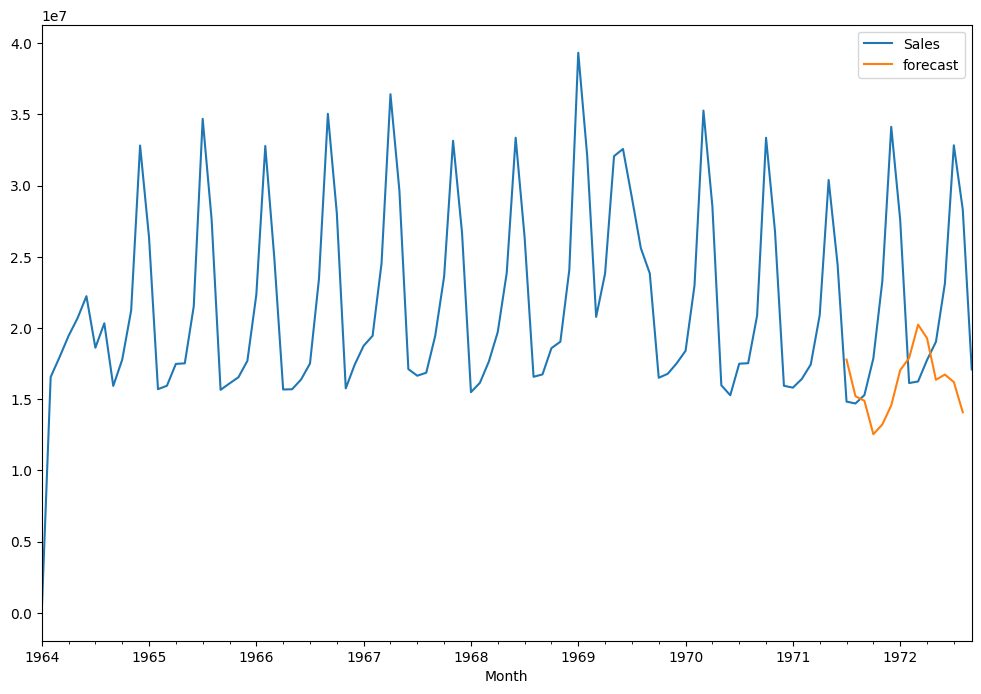

In [205]:
df[['Sales', 'forecast']].plot(figsize=(12,8))

In [206]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

In [207]:
results = model.fit()

In [208]:
df['forecast_SARIMAX'] = results.predict(start=90, end=103, dynamic=True)

In [209]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,16416571.74,611696.72,-6566329.25,NaN,NaN
1971-03-01,17432946.52,1016374.78,-17833880.58,NaN,NaN
1971-04-01,20893607.48,3460660.96,-7641881.43,NaN,NaN
1971-05-01,30390872.61,9497265.13,14418081.34,NaN,NaN
1971-06-01,24457859.11,-5933013.50,9185030.02,NaN,NaN
1971-07-01,14825984.53,-9631874.58,-2662435.93,1.777873e+07,1.777873e+07
1971-08-01,14695770.95,-130213.58,-2827788.02,1.520388e+07,1.520388e+07
1971-09-01,15285473.11,589702.16,-5580280.97,1.488453e+07,1.488453e+07
1971-10-01,17863317.39,2577844.28,-15491967.43,1.253697e+07,1.253697e+07


<Axes: xlabel='Month'>

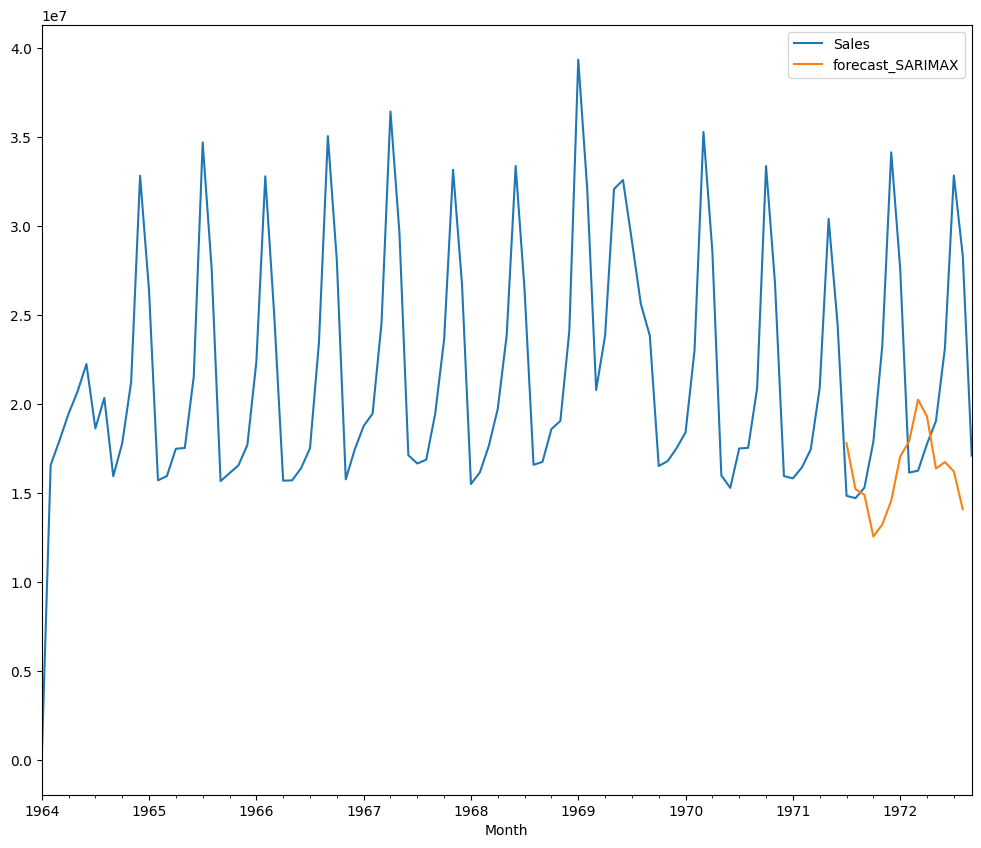

In [210]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [221]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,3)]

In [222]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'), Timestamp('1972-11-01 00:00:00')]

In [223]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [224]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN


In [225]:
future_df = pd.concat([df, future_dataset])

In [226]:
future_df.shape

(107, 5)

In [227]:
future_df['forecast_SARIMAX2'] = results.predict(start=104, end=124, dynamic=True)

<Axes: >

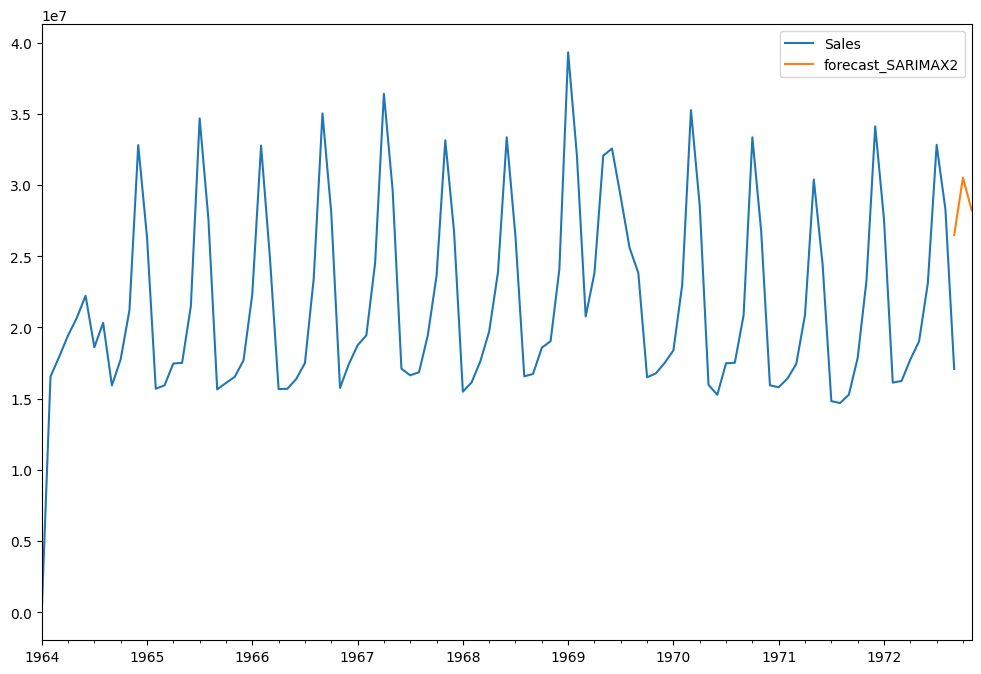

In [228]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12,8))